### Note to self

Run All should do the trick!

In [8]:
import pure_cv as vc
from moveread.core import Game, Player, Sheet, Image
from moveread.annotations.images import Annotations, Rectangle
from moveread.annotations.players import PlayerMeta
from moveread.annotations.sheets import SheetMeta
from moveread.local import LocalAPI
from moveread.export.games import export_samples
api = LocalAPI.at('data')

In [2]:
sheet = vc.imread('../.dev/images/models/fcde/xl.jpg')
ann = Annotations(grid_coords=Rectangle(tl=(0.05, 0.195), size=(0.935, 0.66))).model_dump(exclude_none=True)

In [12]:
pgn = 'e4 c6 d4 d5 Nd2 dxe4 Nxe4 Nf6 Nxf6 exf6 Bc4 Be7 Ne2 Na6'
game = Game(
  id='game-id', meta=dict(pgn=pgn), players=[
    Player(
      meta=PlayerMeta(language='CA').model_dump(),
      sheets=[Sheet(meta=SheetMeta(model='fcde').model_dump(), images=[Image(url='img', meta=ann)])]
    )
  ])
(await api.games.insert('game-id', game, replace=True),
await api.blobs.insert('img', vc.encode(sheet, '.jpg'), replace=True))

(Right(value=None, tag='right'), Right(value=None, tag='right'))

In [13]:
samples = (await export_samples(game, api=api)).unsafe()
xs = samples[0].unsafe().samples

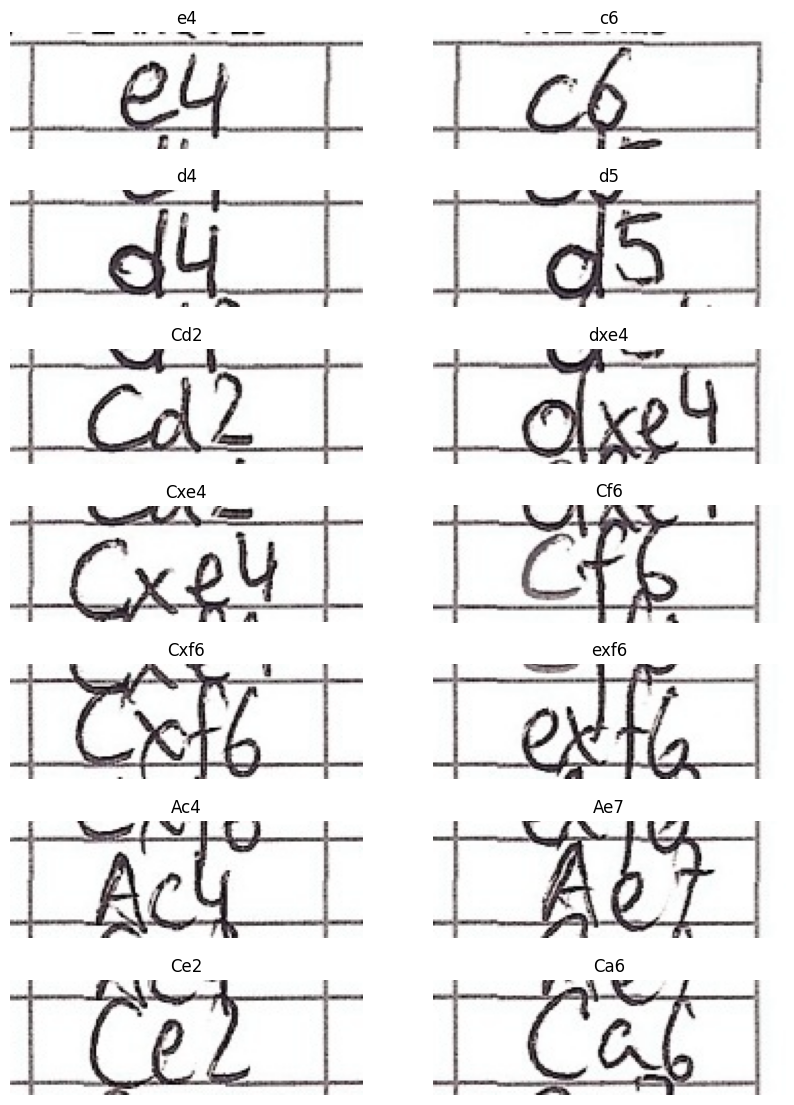

In [14]:
vc.show(*[(x[0].label, x[0].box) for x in xs], ncols=2, height=2)